Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0
Write down the names + student ID of the people in your group.

__Jier Nzuanzu__ <br>  - 10223258 

__Lennart Mettrop__ <br> - 10432973

__Tharangni Harsha Sivaji__ <br> - 11611065

----
# Project keywords
ODEs, time integration

----
# Project description
There is a wide variety of mathematical models for time-evolving systems formulated as sets of coupled ordinary differential equations (ODEs). Examples range from meteorology and population dynamics to celestial mechanics and chemical reactions. In many cases, these ODEs cannot be solved analytically, and instead they are simulated by means of numerical time integration. In this assignment we will explore various various time integration methods.



We consider a very simple system, one where we know the exact (analytical) solution so that we can easily compare results from numerical integration with the exact solution. The set of ODEs
$$\begin{array}{rcl}
\frac{dx}{dt} & = & y, \\
\frac{dy}{dt} & = & -\omega^2 \, x
\end{array}$$
are the equations for the $\textit{harmonic oscillator}$. This is a Hamiltonian system for which the Hamiltonian (or total energy) is given by $H=\tfrac12 (y^2 + \omega^2 \, x^2)$. 

----
# Project exercises
## Exercise 1
Read sections 9.1-9.3 from the book by Heath.

----
----
## Exercise 2
Solve the ODEs for the harmonic oscillator. Write down exact expressions for $x(t)$ and $y(t)$ given an arbitrary initial condition $x(t=0)=x_0, \, y(t=0)=y_0$. Make sure you solution is correct, as this will be your benchmark to compare numerical solutions against.

----
First we rewrite the differential equations as a matrix $A$:
\begin{align*}
    \begin{pmatrix}
\frac{dx}{dt} \\
\frac{dy}{dt} 
\end{pmatrix} = 
\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0 
\end{pmatrix}\begin{pmatrix}
x \\
y 
\end{pmatrix}.
\end{align*}

To find a general solution, we have to find the eigenvalues and eigenvectors. So we check when the determinant equals $0$:
\begin{align*}
    det\begin{pmatrix}
-\lambda & 1 \\
-\omega^2 & -\lambda 
\end{pmatrix} = \lambda^2+\omega^2=0 \iff \lambda=\omega i \;\text{ or }\;\lambda=-\omega i.
\end{align*}

So we find two eigenvalues $\lambda_1=\omega i$ and $\lambda_2=-\omega i$ and so we know already that the solution will be a circle. We find the corresponding eigenvectors $v_1$ and $v_2$:
\begin{align*}
    \lambda_1 \to v_1=\begin{pmatrix}
1 \\
\omega i 
\end{pmatrix}, \;\;\;\;\;\lambda_2\to v_2=\begin{pmatrix}
1 \\
-\omega i 
\end{pmatrix}.
\end{align*}

A general solution is given by:
\begin{align*}
    x(t)=c_1e^{\omega i\cdot t}\begin{pmatrix}
1 \\
\omega i 
\end{pmatrix} + c_2e^{-\omega i\cdot t}\begin{pmatrix}
1 \\
-\omega i 
\end{pmatrix}.
\end{align*}

To find the values for the constants $c_1$ and $c_2$, we use the fact that $x(0)=x_0$ and $y(0)=y_0$. So we check when $x(0)$ equals to $(x_0\;\;y_0)^T$. In the following equation we used that $e^{\pm\omega i\cdot 0}=e^0=1$, so we have:
\begin{align*}
    \begin{bmatrix}
c_1 & c_2 \\
c_1\omega i & -c_2\omega i 
\end{bmatrix}=\begin{bmatrix}
x_0 \\
y_0 
\end{bmatrix},
\end{align*}
so:
\begin{align*}
    x_0 &= c_1 + c_2\\
    y_0 &= \omega i(c_1-c_2).
\end{align*}
Solving these equations gives us:
\begin{align*}
    c_1 &= \frac{1}{2} x_0 -\frac{i}{2\omega}y_0\\
    c_2 &= \frac{1}{2} x_0 + \frac{i}{2\omega}y_0.
\end{align*}

Remember the following rules:
\begin{align*}
    \cos(\theta) &= \frac{1}{2}\big(e^{+i\theta}+e^{-i\theta}\big)\\[5pt]
    \sin(\theta) &= \frac{1}{2i}\big(e^{+i\theta}-e^{-i\theta}\big)
\end{align*}

Finally, we can use the results for $c_1$ and $c_2$ to get the formulas for $x(t)$ and $y(t)$ using above rules for the cosinus and sinus. We get:
\begin{align*}
    \begin{bmatrix}
x(t) \\
y(t) 
\end{bmatrix} &= \begin{bmatrix}
\big(\frac{1}{2}x_0-\frac{i}{2\omega}y_0\big)e^{\omega i\cdot t} +  \big(\frac{1}{2}x_0+\frac{i}{2\omega}y_0\big)e^{-\omega i\cdot t}\\
\omega i\big(\frac{1}{2}x_0-\frac{i}{2\omega}y_0\big)e^{\omega i\cdot t} -  \omega i\big(\frac{1}{2}x_0+\frac{i}{2\omega}y_0\big)e^{-\omega i\cdot t} 
\end{bmatrix}\\[5pt]
&=\begin{bmatrix}
\frac{1}{2}\bigg(\big(x_0-\frac{i}{\omega}y_0\big)e^{\omega i\cdot t} +  \big(x_0+\frac{i}{\omega}y_0\big)e^{-\omega i\cdot t}\bigg)\\
\frac{1}{2}\bigg(\big(-\frac{\omega}{i}x_0+y_0\big)e^{\omega i\cdot t} - \big(-\frac{\omega}{i}x_0-y_0\big)e^{-\omega i\cdot t} \bigg)
\end{bmatrix}\\[5pt]
&=\begin{bmatrix}
x_0\frac{1}{2}\big(e^{\omega t\cdot i}+e^{-\omega t\cdot i}\big)+\frac{y_0}{\omega}\frac{1}{2i}\big(e^{\omega t\cdot i} - e^{-\omega t\cdot i}\big)\\
-\omega x_0\frac{1}{2i}\big(e^{\omega t\cdot i}-e^{-\omega t\cdot i}\big)+y_0\frac{1}{2}\big(e^{\omega t\cdot i} + e^{-\omega t\cdot i}\big)
\end{bmatrix}\\[5pt]
&=\begin{bmatrix}
x_0\cos(\omega t)+\frac{y_0}{\omega}\sin(\omega t)\\
y_0\cos(\omega t)-\omega x_0\sin(\omega t)
\end{bmatrix}
\end{align*}

----
----
## Exercise 3
Prove that the Hamiltonian is a conserved quantity, i.e. $H$ remains constant in time.

----
When we fill in the formulas of $x(t)$ and $y(t)$ we found in the previous exercise, we get for $H$:
\begin{align*}
    H&=\frac12 \big(y(t)^2 + \omega^2 \, x(t)^2\big)\\[5pt]
    &=\frac{1}{2}\bigg(\big(y_0\cos(\omega t)-\omega x_0\sin(\omega t)\big)^2+\omega^2\big(x_0\cos(\omega t)+\frac{y_0}{\omega}\sin(\omega t)\big)^2\bigg)\\[5pt]
    &=\frac{1}{2}\bigg(y_0^2\cos(\omega t)^2-\omega^2x_0^2\sin(\omega t)^2 - 2y_0x_0\cos(\omega t)\sin(\omega t)+\omega^2x_0^2\cos(\omega t)^2\\[5pt]
    &\;\;\;\;\;\;y_0^2\sin(\omega t)^2 + 2x_0y_0\cos(\omega t)\sin(\omega t)\bigg)\\[5pt]
    &=\frac{1}{2}\bigg(\omega^2x_0^2\big(\cos(\omega t)^2 + \sin(\omega t)^2\big) + y_0^2\big(\cos(\omega t)^2 + \sin(\omega t)^2\big)\bigg)\\[5pt]
    &=\frac{1}{2}\bigg(\omega^2x_0^2 + y_0^2\bigg)
\end{align*}

As all the terms depending on $t$ have been ruled out, $H$ stays constant over time. So it's a conserved quantity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import plot, draw, show
from scipy.linalg import lu
import scipy.linalg as la
import random
import simpy
import math
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [15, 18]

params = {'legend.fontsize': 30,
          'legend.handlelength': 8}
plt.rcParams.update(params)


sns.plotting_context("notebook", font_scale=1.5)

def plotpretify(ax, maxx, minx=0):
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=True,
        left=False,
        right=False,
        labelleft=True)
    ax.grid(True)
    
    ax.set_xlim(minx, maxx)

----
----
## Exercise 4
Set $\omega=1$. Use the forward Euler scheme to integrate the ODEs in time, from $t=0$ to $t=50$, with initial condition e.g. $(x_0,y_0)=(1,0)$. What is you time step $\Delta t$? Compare your numerical solution with the exact solution: make a plot of $x(t)$ versus $t$ for both solutions, and plot $H$ versus $t$. Pick a set of initial conditions (e.g. the corners of a square, $(x_0, y_0) = (1\pm 0.5, \pm 0.5)$), integrate these forward up to $t=10$, and plot the paths $(x(t),y(t))$. Compare with the exact solution.


----
Function defenitions:

In [3]:
def dx(y, t):
    return y


def dy(x, t, w=1):
    return -w**2 * x


def f(x, t, w=1):
    return [dx(x[1], t), dy(x[0], t, w)]

Function for the Forward Euler method:

In [4]:
def feuler(f, init=[1, 0], T=[0, 50], t=50, w=1):
    h = (T[1] - T[0]) / t
    x0 = np.array(init[:])
    result = np.zeros((t+1, 2))
    for i, r in enumerate(np.linspace(T[0],T[1],t+1)):
        x1 = x0 + h * np.array(f(x0, r, w))
        x0 = x1
        result[i][0] = x1[0]
        result[i][1] = x1[1]
    return result

Functions for the real Hamiltonian as well for the Hamiltionian calculated from the approximations:

In [5]:
def Hreal(t, x0, y0, w=1):
    return (1 / 2) * (np.power(y(t, x0, y0, w), 2) +
                      np.power(w, 2) * np.power(x(t, x0, y0, w), 2))

def H(t, x0, y0, w=1):
    return (1 / 2) * (np.power(y0, 2) +
                      np.power(w, 2) * np.power(x0, 2))

Exact solution:

In [6]:
def x(t, x0, y0, w=1):
    return x0 * np.cos(w * t) + (1 / w) * y0 * np.sin(w * t)


def y(t, x0, y0, w=1):
    return y0 * np.cos(w * t) - w * x0 * np.sin(w * t)

Functions to calculate the error:

In [7]:
# Gives the error as the distance away from the circle through the initial
# point which is the real result.
def maxError(method, timesteps, init=[1,0], plot=False):
    lists = []
    start = [0, 1]
    if not plot:
        print("Starting at point {}:".format(init))
    for i in timesteps:
        result = method(f, init=init, T=[0,10], t=i)
        result = np.linalg.norm(result[-1])
        maxi = np.max(np.abs(result - np.linalg.norm(init)))
        if not plot:
            print("For timestep {} max error is {}".format(10/i, maxi))
        lists.append(maxi)
    return lists

In [8]:
# Gives the error using the Hamiltonian function.
# Gives the same error values as using the distance when using small enough
# step sizes.
def maxErrorUsingHameltonian(method, timesteps):
    lists = []
    start = [0, 1]
    for i in timesteps:
        x_H_list = np.linspace(0, 50, i + 1)
        real = [Hreal(t, start[0], start[1]) for t in x_H_list]
        result = method(f, t=i)
        Hlist = [H(t, result[t,0], result[t, 1]) for t in range(len(result))]
        maxi = np.max(np.abs(np.array(Hlist) - np.array(real)))
        print("For {} timesteps max error is {}".format(i, maxi))
        lists.append(maxi)
    return lists
        

Function to plot the norm of the error over the step size:

In [9]:
def plotNorm(tr, method, steps=10):
    x = []
    for ts in range(10, 1000, steps):
        x.append(np.abs(np.linalg.norm(method(f, init=[0, 1], T=[0,tr], t=tr * ts)[-1])-1.0))
    plt.rcParams['figure.figsize'] = [15, 5]
    ax = plt.subplot(111)
    ax.loglog(range(10, 1000, steps), x)
    ax.scatter([10, 100, 1000], maxError(method, [100, 1000, 10000], plot=True), color='black')
    ax.set_xlabel("Number of time steps", fontsize=18)
    ax.set_ylabel("Norm of global error", fontsize=18)
    ax.set_xticks([10, 100, 1000])
    ax.set_title("Logarithmic plot of the norm of the error over the number of timesteps.", fontsize=18)

### Results Forward Euler method

At time step $\Delta t = 0.1$

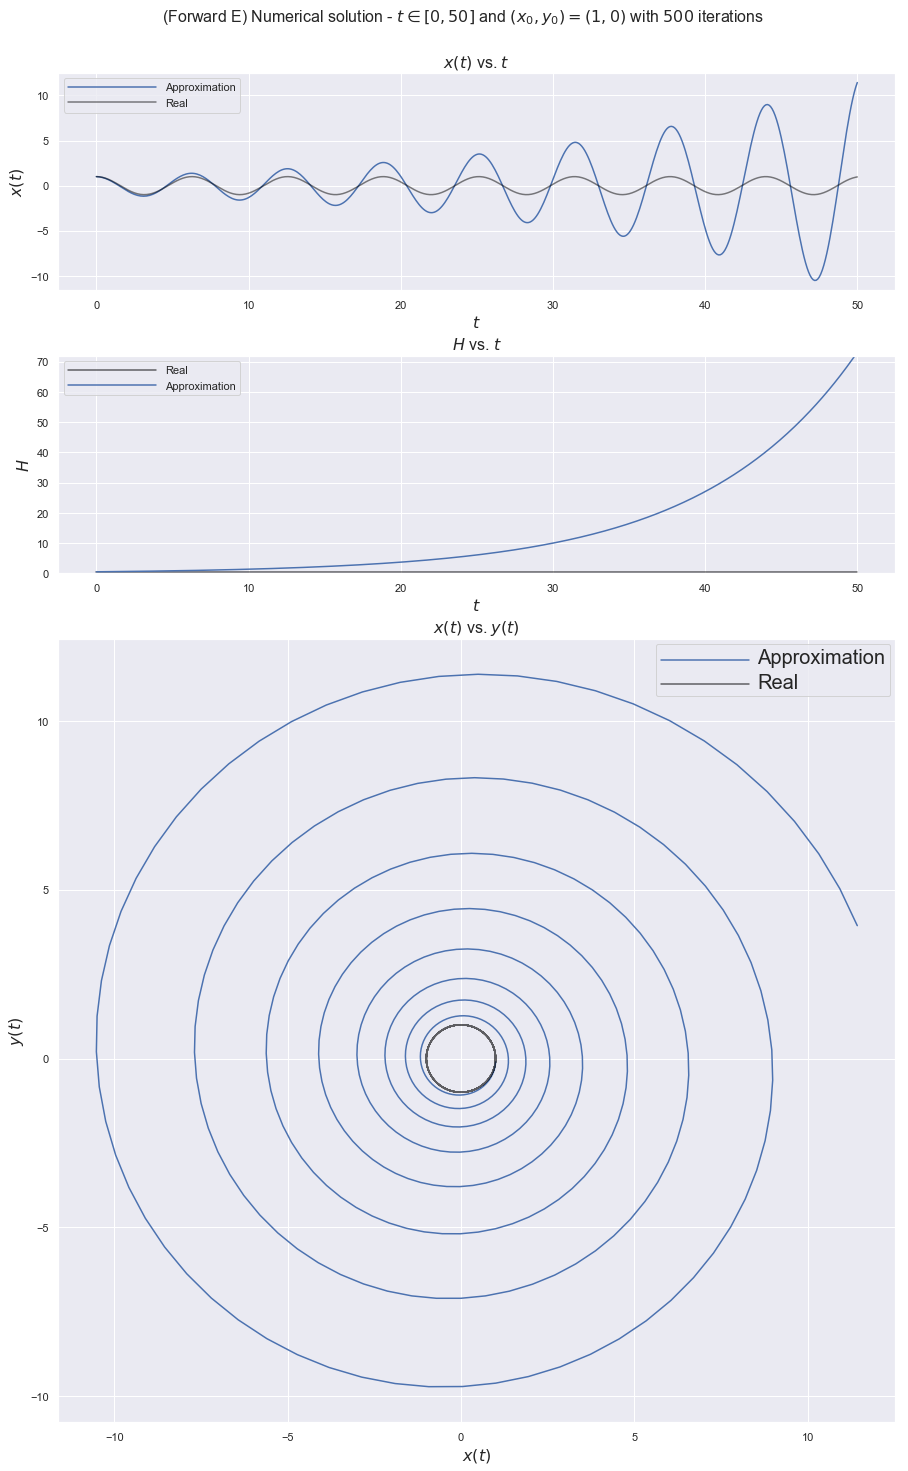

In [10]:
ts = 500
result = feuler(f, t=ts)

start = (1, 0)
T = [0, 50]
x_H_list = np.linspace(T[0], T[1], ts + 1)
H_list_real = [Hreal(t, start[0], start[1]) for t in x_H_list]
H_list = [H(t, result[t,0], result[t, 1]) for t in range(len(result))]
# print(H_list_real)

xlist = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]
ylist = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]

plt.rcParams['figure.figsize'] = [15, 23]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot2grid((5,1),(0,0))
ax2.plot(x_H_list, result[:,0], label="Approximation")
ax2.plot(x_H_list, xlist, color="black", alpha=0.5, label="Real")
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)
ax2.legend()
# plt.setp(ax.get_legend().get_texts(), fontsize='20')

ax3 = plt.subplot2grid((5,1),(1,0))
ax3.plot(x_H_list, H_list_real, color="black", alpha=0.6, label="Real")
ax3.plot(x_H_list, H_list, label="Approximation")
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16)
ax3.legend();
ax3.set_ylim(0, 72)
# plt.setp(ax.get_legend().get_texts(), fontsize='20')

ax = plt.subplot2grid((5,1),(2,0), rowspan=3)
ax.plot(result[:,0], result[:,1], label="Approximation")
ax.plot(xlist, ylist, color="black", alpha=0.6, label="Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')

plt.suptitle("(Forward E) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $500$ iterations", fontsize=16);

Starting from the corners of a square with corner points $(x_0, y_0) = (1\pm 0.5, \pm 0.5)$ and time step $\Delta t = 0.2$:

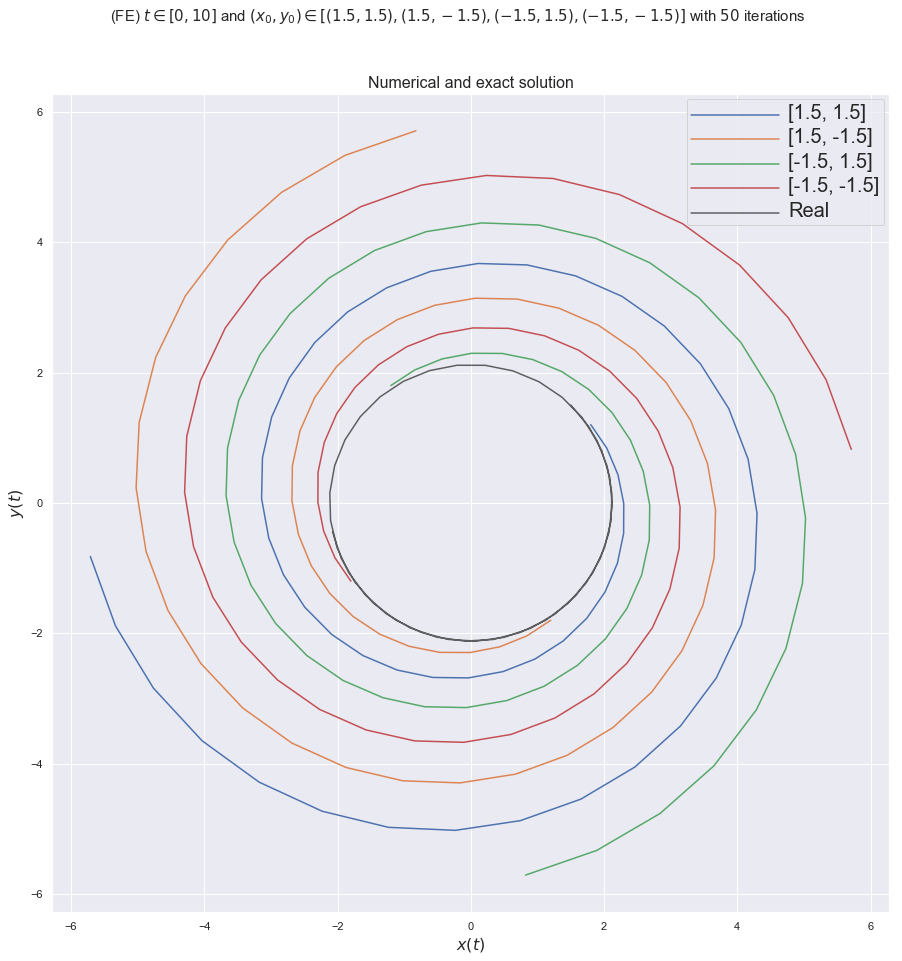

In [11]:
result1 = feuler(f, init=[1.5, 1.5], T=[0,10], t=50)
result2 = feuler(f, init=[1.5, -1.5], T=[0,10], t=50)
result3 = feuler(f, init=[-1.5, 1.5], T=[0,10], t=50)
result4 = feuler(f, init=[-1.5, -1.5], T=[0,10], t=50)

T = [0, 10]
t = 50
start = (1.5, 1.5)
xlist1 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist1 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (1.5, -1.5)
xlist2 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist2 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, 1.5)
xlist3 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist3 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, -1.5)
xlist4 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist4 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]

plt.rcParams['figure.figsize'] = [15, 30]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.15)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax = plt.subplot(211)
ax.plot(result1[:,0], result1[:,1], label = "[1.5, 1.5]")
ax.plot(result2[:,0], result2[:,1], label = "[1.5, -1.5]")
ax.plot(result3[:,0], result3[:,1], label = "[-1.5, 1.5]")
ax.plot(result4[:,0], result4[:,1], label = "[-1.5, -1.5]")
ax.plot(xlist1, ylist1, color="black", alpha=0.6, label = "Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')
ax.set_title("Numerical and exact solution", fontsize=16)

plt.suptitle("(FE) $t\in[0,10]$ and $(x_0,y_0) \in [(1.5,1.5),(1.5,-1.5),(-1.5,1.5),(-1.5,-1.5)]$ with $50$ iterations", fontsize = 15);

----
----
## Exercise 5
Experiment with changing the integration time step $\Delta t$. Assess the convergence by plotting the norm of the error (at some fixed time, e.g. $t=1$) versus $\Delta t$, over several orders of magnitude of $\Delta t$. Can you see that Euler's method is 1st order accurate?

----
At time step $\Delta t = 0.001$:

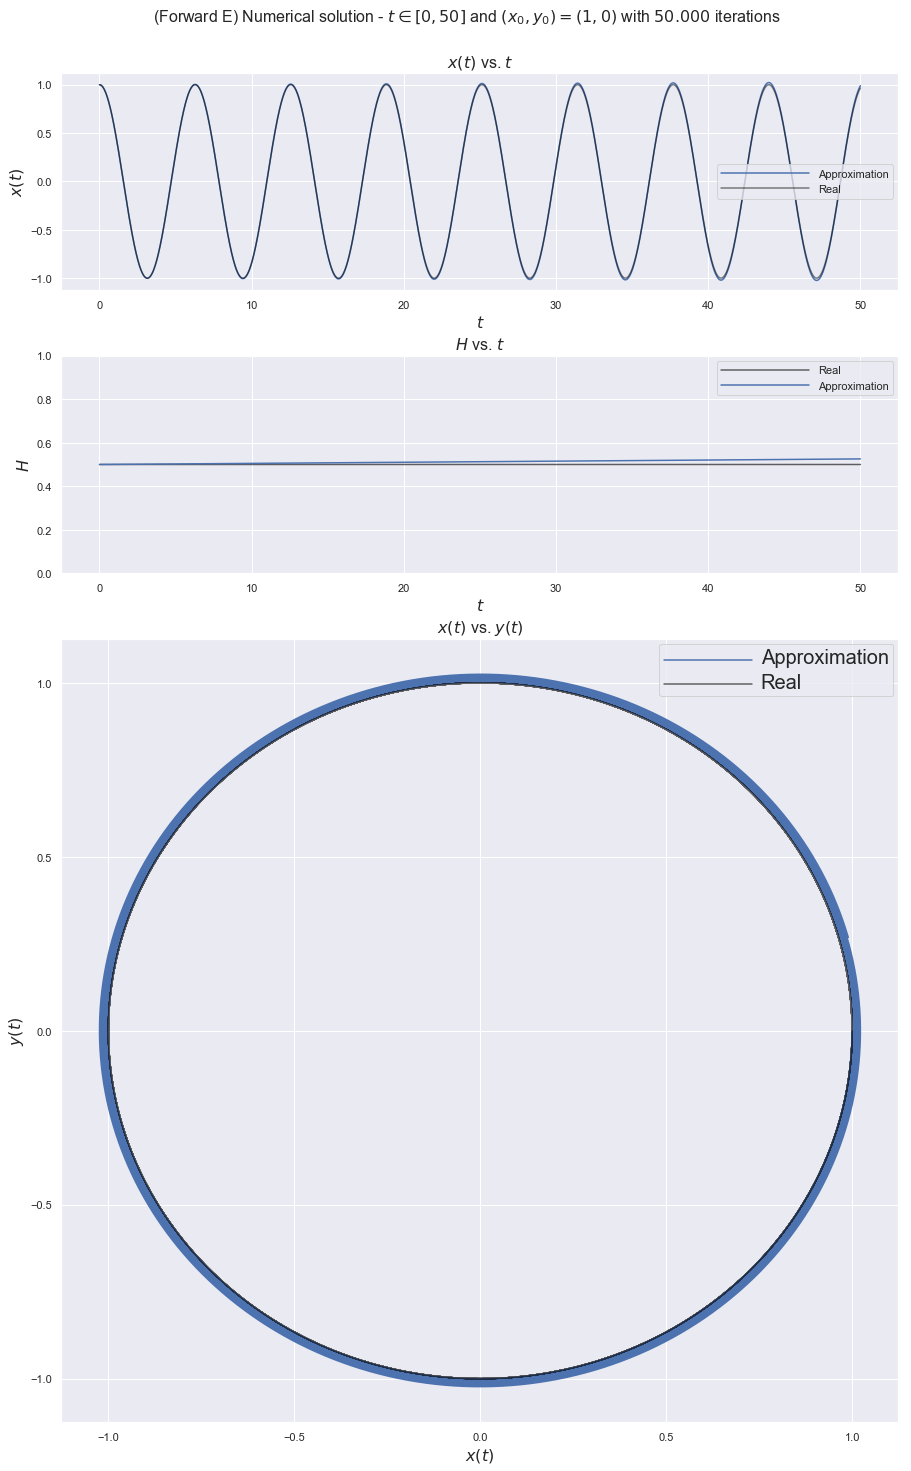

In [12]:
ts = 50000
result = feuler(f, t=ts)

start = (1, 0)
T = [0, 50]
x_H_list = np.linspace(T[0], T[1], ts + 1)
H_list_real = [Hreal(t, start[0], start[1]) for t in x_H_list]
H_list = [H(t, result[t,0], result[t, 1]) for t in range(len(result))]
# print(H_list_real)

xlist = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]
ylist = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]


plt.rcParams['figure.figsize'] = [15, 23]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot2grid((5,1),(0,0))
ax2.plot(x_H_list, result[:,0], label="Approximation")
ax2.plot(x_H_list, xlist, color="black", alpha=0.5, label="Real")
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)
ax2.legend()

ax3 = plt.subplot2grid((5,1),(1,0))
ax3.plot(x_H_list, H_list_real, color="black", alpha=0.6, label="Real")
ax3.plot(x_H_list, H_list, label="Approximation")
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16)
ax3.legend();
ax3.set_ylim(0, 1)

ax = plt.subplot2grid((5,1),(2,0), rowspan=3)
ax.plot(result[:,0], result[:,1], label="Approximation")
ax.plot(xlist, ylist, color="black", alpha=0.6, label="Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')


plt.suptitle("(Forward E) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $50.000$ iterations", fontsize=16);

At time step $\Delta t = 0.02$:

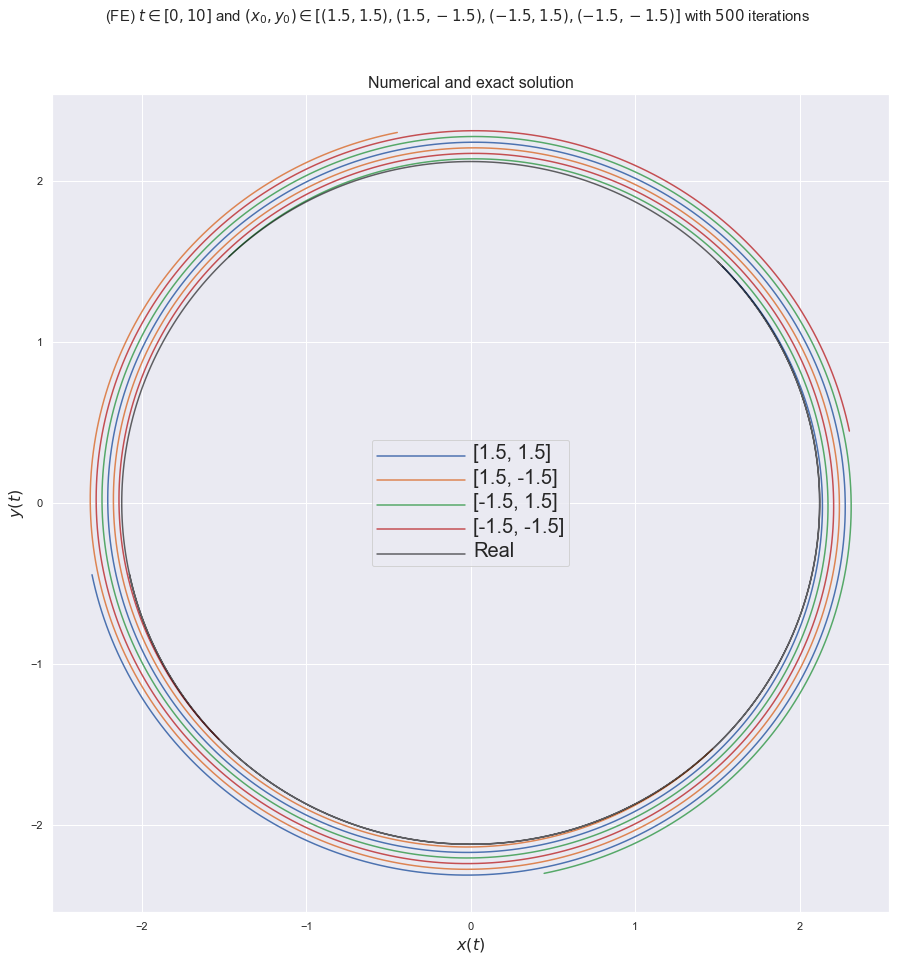

In [13]:
result1 = feuler(f, init=[1.5, 1.5], T=[0,10], t=500)
result2 = feuler(f, init=[1.5, -1.5], T=[0,10], t=500)
result3 = feuler(f, init=[-1.5, 1.5], T=[0,10], t=500)
result4 = feuler(f, init=[-1.5, -1.5], T=[0,10], t=500)

T = [0, 10]
t = 500
start = (1.5, 1.5)
xlist1 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist1 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (1.5, -1.5)
xlist2 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist2 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, 1.5)
xlist3 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist3 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, -1.5)
xlist4 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist4 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]

plt.rcParams['figure.figsize'] = [15, 30]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.15)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax = plt.subplot(211)
ax.plot(result1[:,0], result1[:,1], label = "[1.5, 1.5]")
ax.plot(result2[:,0], result2[:,1], label = "[1.5, -1.5]")
ax.plot(result3[:,0], result3[:,1], label = "[-1.5, 1.5]")
ax.plot(result4[:,0], result4[:,1], label = "[-1.5, -1.5]")
ax.plot(xlist1, ylist1, color="black", alpha=0.6, label = "Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')
ax.set_title("Numerical and exact solution", fontsize=16)

plt.suptitle("(FE) $t\in[0,10]$ and $(x_0,y_0) \in [(1.5,1.5),(1.5,-1.5),(-1.5,1.5),(-1.5,-1.5)]$ with $500$ iterations", fontsize = 15);

At time step $\Delta t = 0.01$:

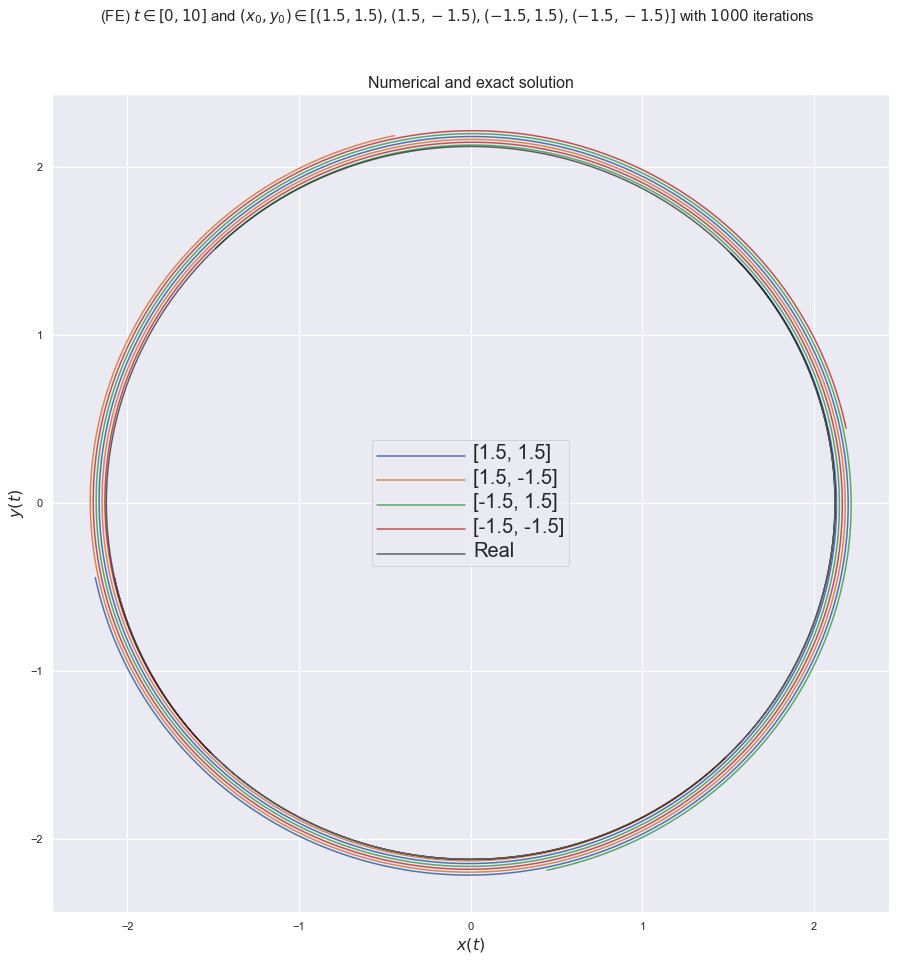

In [14]:
result1 = feuler(f, init=[1.5, 1.5], T=[0,10], t=1000)
result2 = feuler(f, init=[1.5, -1.5], T=[0,10], t=1000)
result3 = feuler(f, init=[-1.5, 1.5], T=[0,10], t=1000)
result4 = feuler(f, init=[-1.5, -1.5], T=[0,10], t=1000)

T = [0, 10]
t = 1000
start = (1.5, 1.5)
xlist1 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist1 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (1.5, -1.5)
xlist2 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist2 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, 1.5)
xlist3 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist3 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, -1.5)
xlist4 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist4 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]

plt.rcParams['figure.figsize'] = [15, 30]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.15)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax = plt.subplot(211)
ax.plot(result1[:,0], result1[:,1], label = "[1.5, 1.5]")
ax.plot(result2[:,0], result2[:,1], label = "[1.5, -1.5]")
ax.plot(result3[:,0], result3[:,1], label = "[-1.5, 1.5]")
ax.plot(result4[:,0], result4[:,1], label = "[-1.5, -1.5]")
ax.plot(xlist1, ylist1, color="black", alpha=0.6, label = "Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')
ax.set_title("Numerical and exact solution", fontsize=16)

plt.suptitle("(FE) $t\in[0,10]$ and $(x_0,y_0) \in [(1.5,1.5),(1.5,-1.5),(-1.5,1.5),(-1.5,-1.5)]$ with $1000$ iterations", fontsize = 15);

### Order of accuracy

A logarithmic plot which shows that the error gets $10$ times smaller when the step size gets $10$ times smaller. So the order of accuracy is $O(h^2)$.

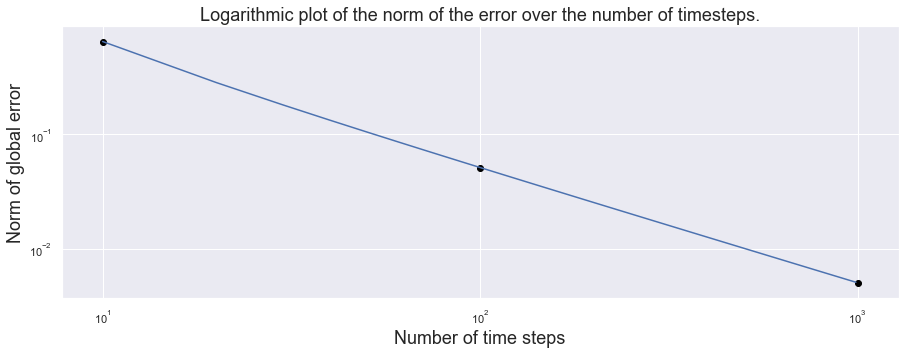

In [15]:
plotNorm(10, feuler);

The exact result of above plot at different step sizes:

In [16]:
listt = maxError(feuler, [100, 1000, 10000, 100000]);

Starting at point [1, 0]:
For timestep 0.1 max error is 0.6528345252068464
For timestep 0.01 max error is 0.05132103048616532
For timestep 0.001 max error is 0.00501302085300015
For timestep 0.0001 max error is 0.0005001300208484771


----
----
## Exercise 6
Repeat the experiments above, but now with the backward Euler scheme.

----
Function for the Backward Euler method:

In [17]:
from scipy.optimize import fsolve

def dxdx(x, y, t, w=1):
    return -w**2*x

def dydy(x, y, t, w=1):
    return -w**2 * y

def dxdy(x, y, t, w=1):
    return -w**2*x

def dydx(x, y, t, w=1):
    return -w**2 * y

def df(x, t, w=1):
    return [dxdx(x[0], x[1], t, w), dydy(x[0], x[1], t, w)]

def hulpf(x1, x0, h, r, w=1):
    return x1 - x0 + h * np.array(f(x1, r + h, w))

def hulpdf(x1, x0, h, r, w=1):
    return 1 + h * np.array(df(x1, r + h, w))

def newtong(x1, x0, h, r, w=1):
    return x1 - hulpf(x1, x0, h, r, w) / hulpdf(x1, x0, h, r, w)

def newton(xstart, x0, h, r, w=1, tol=10**-9):
    x = xstart
#     print(any(k > tol for k in np.abs(hulpf(x, x0, h, r, w))))
    while any(k > tol for k in np.abs(hulpf(x, x0, h, r, w))):
        x = newtong(x, x0, h, r, w)
    return x

def beuler(f, init=[1, 0], T=[0, 50], t=50, w=1):
    h = (T[1] - T[0]) / t
    x0 = np.array(init[:])
    result = np.zeros((t+1, 2))
    for i, r in enumerate(np.linspace(T[0],T[1],t+1)):
        x1 = newton(x0, x0, h, r, w=1, tol=10**-9)
        x0 = x1
        result[i][0] = x1[0]
        result[i][1] = x1[1]
    return result

### Results Backward Euler method

At time step $\Delta t = 0.1$:

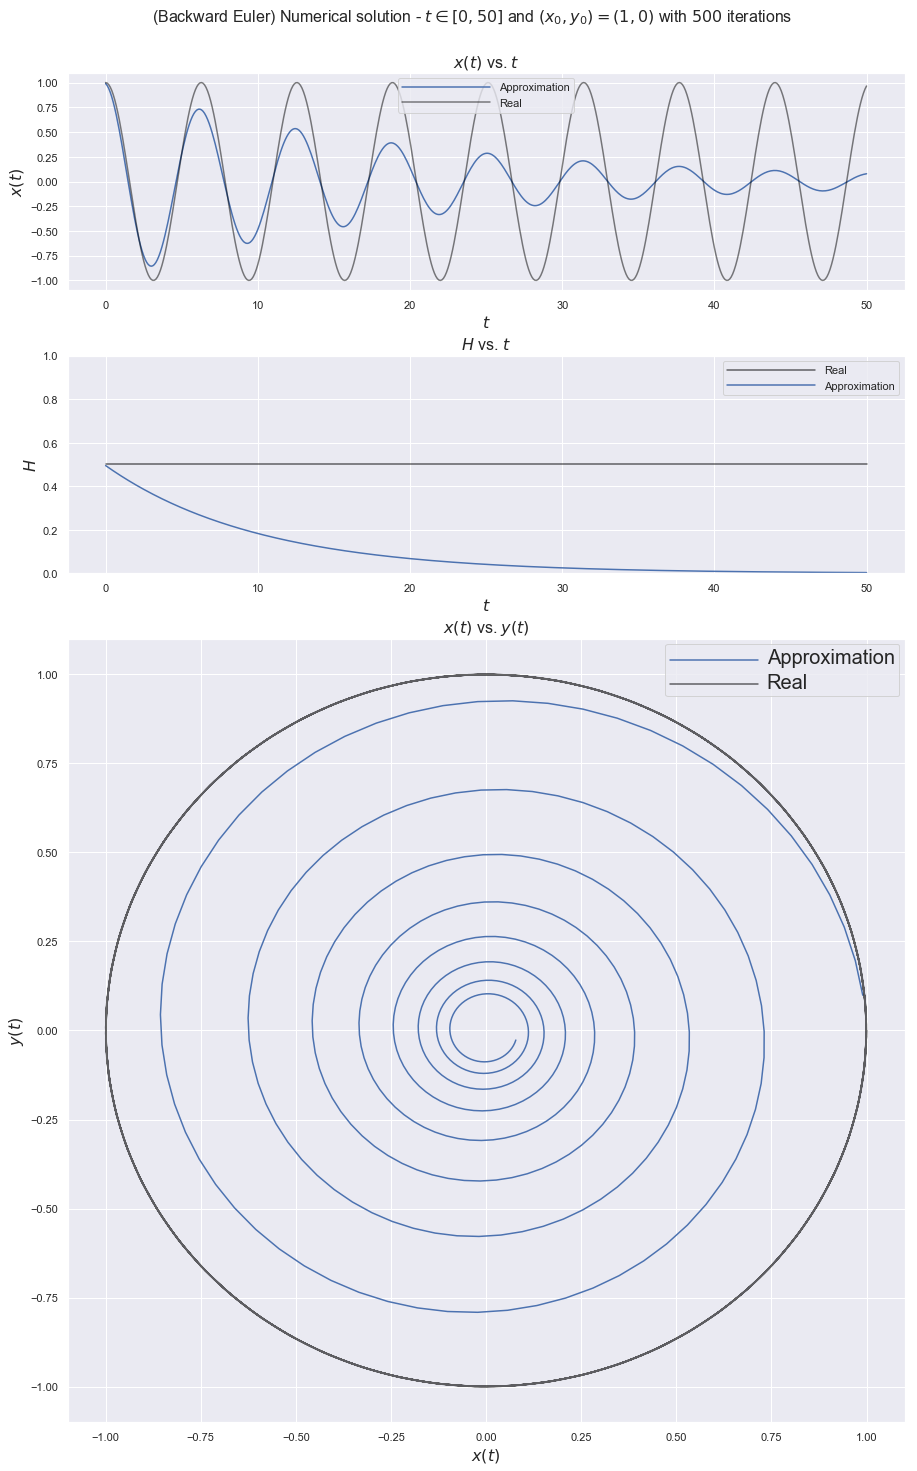

In [18]:
ts = 500
result = beuler(f, t=ts)

start = (1, 0)
T = [0, 50]
x_H_list = np.linspace(T[0], T[1], ts + 1)
H_list_real = [Hreal(t, start[0], start[1]) for t in x_H_list]
H_list = [H(t, result[t,0], result[t, 1]) for t in range(len(result))]
# print(H_list_real)

xlist = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]
ylist = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]

plt.rcParams['figure.figsize'] = [15, 23]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot2grid((5,1),(0,0))
ax2.plot(x_H_list, result[:,0], label="Approximation")
ax2.plot(x_H_list, xlist, color="black", alpha=0.5, label="Real")
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)
ax2.legend()

ax3 = plt.subplot2grid((5,1),(1,0))
ax3.plot(x_H_list, H_list_real, color="black", alpha=0.6, label="Real")
ax3.plot(x_H_list, H_list, label="Approximation")
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16)
ax3.legend();
ax3.set_ylim(0, 1)

ax = plt.subplot2grid((5,1),(2,0), rowspan=3)
ax.plot(result[:,0], result[:,1], label="Approximation")
ax.plot(xlist, ylist, color="black", alpha=0.6, label="Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')

plt.suptitle("(Backward Euler) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $500$ iterations", fontsize=16);

At time step $\Delta t = 0.001$:

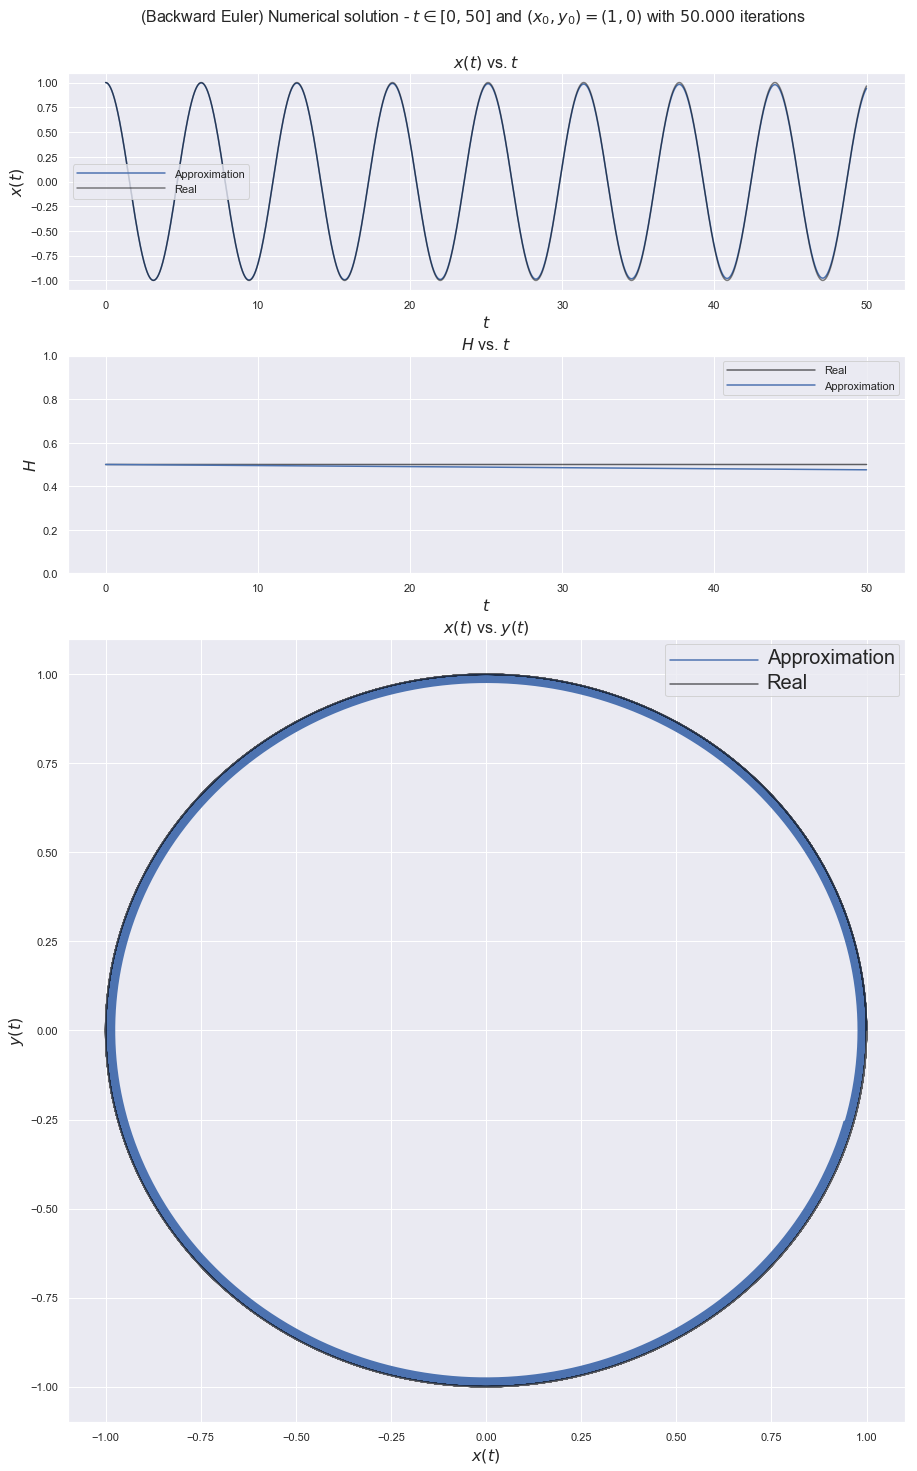

In [19]:
ts = 50000
result = beuler(f, t=ts)

start = (1, 0)
T = [0, 50]
x_H_list = np.linspace(T[0], T[1], ts + 1)
H_list_real = [Hreal(t, start[0], start[1]) for t in x_H_list]
H_list = [H(t, result[t,0], result[t, 1]) for t in range(len(result))]
# print(H_list_real)

xlist = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]
ylist = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]

plt.rcParams['figure.figsize'] = [15, 23]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot2grid((5,1),(0,0))
ax2.plot(x_H_list, result[:,0], label="Approximation")
ax2.plot(x_H_list, xlist, color="black", alpha=0.5, label="Real")
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)
ax2.legend()

ax3 = plt.subplot2grid((5,1),(1,0))
ax3.plot(x_H_list, H_list_real, color="black", alpha=0.6, label="Real")
ax3.plot(x_H_list, H_list, label="Approximation")
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16)
ax3.legend();
ax3.set_ylim(0, 1)

ax = plt.subplot2grid((5,1),(2,0), rowspan=3)
ax.plot(result[:,0], result[:,1], label="Approximation")
ax.plot(xlist, ylist, color="black", alpha=0.6, label="Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')

plt.suptitle("(Backward Euler) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $50.000$ iterations", fontsize=16);

### Order of accuracy

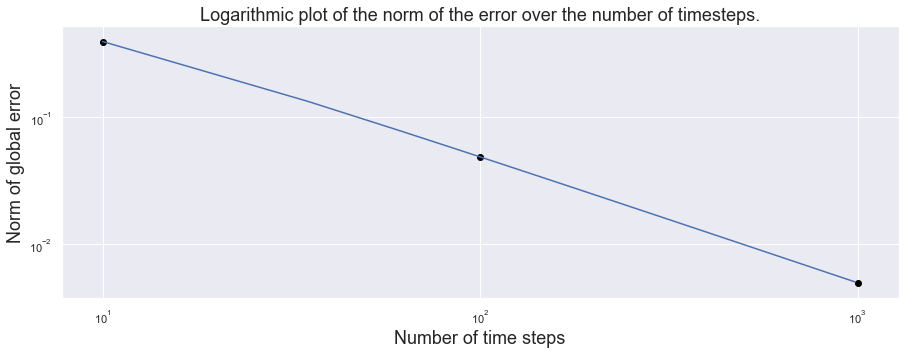

In [20]:
plotNorm(10, beuler, steps=25);

In [21]:
maxError(beuler, [100, 1000, 10000, 100000]);

Starting at point [1, 0]:
For timestep 0.1 max error is 0.39497875476958
For timestep 0.01 max error is 0.0488157426554815
For timestep 0.001 max error is 0.004988005795457662
For timestep 0.0001 max error is 0.0004998919323009332


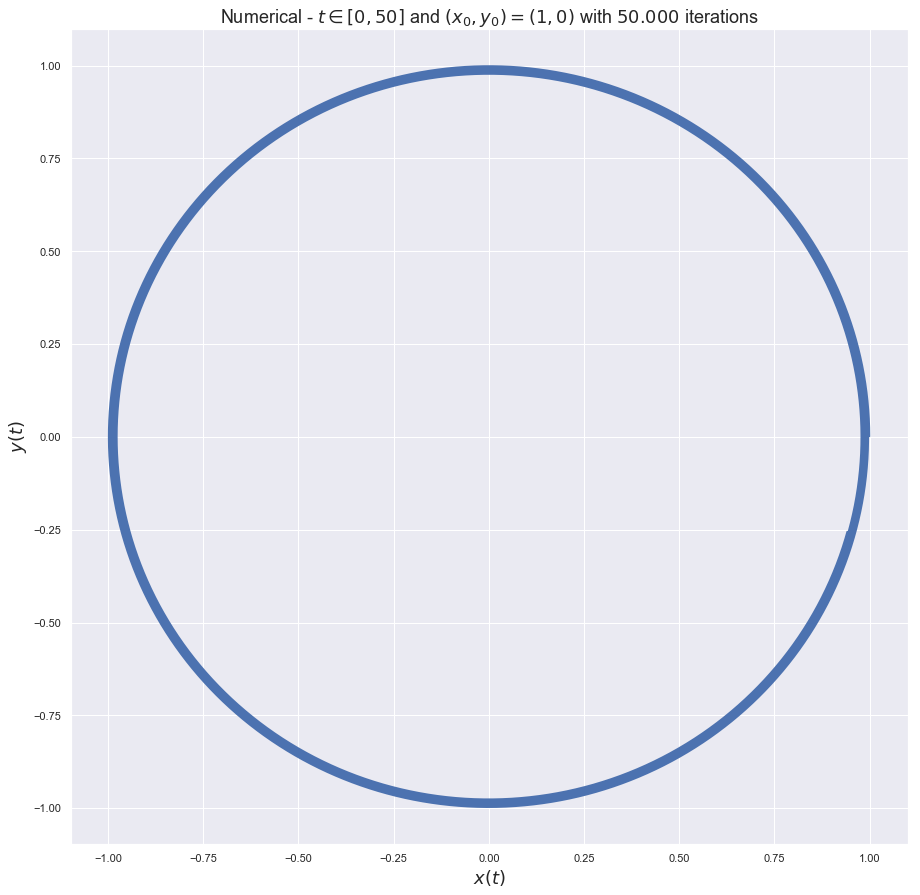

In [22]:
result = beuler(f, t=50000)
plt.rcParams['figure.figsize'] = [15, 15]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
ax = plt.subplot(111)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))
ax.plot(result[:,0], result[:,1])
ax.set_xlabel("$x(t)$", fontsize=18)
ax.set_ylabel("$y(t)$", fontsize=18)
ax.set_title("Numerical - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $50.000$ iterations", fontsize=18);

----
----
## Exercise 7
Experiment with an integration schemes that gives higher order accuracy. Can you verify the order of accuracy with your numerical experiments? Does it conserve the Hamiltonian?

----
Function for the Runge Kutta method:

In [23]:
def dx2(_, y, t):
    return y


def dy2(x, _, t, w=1):
    return -w**2 * x

In [24]:
def rungekutta(f, init=[1, 0], T=[0, 50], t=50, w=1):
    h = (T[1] - T[0]) / t
    z = np.array(init[:])
    result = np.zeros((t + 1, 2))
    tsold = 0
    ts = 0
    i = 0
    for i, ts in enumerate(np.linspace(T[0], T[1], t + 1)):
        x = z[0]
        y = z[1]
        k1 = dx2(x, y, ts)
        l1 = dy2(x, y, ts)

        x2 = x + 0.5 * h * k1
        y2 = y + 0.5 * h * l1
        ts2 = ts + 0.5 * h
        k2 = dx2(x2, y2, ts2)
        l2 = dy2(x2, y2, ts2)

        x3 = x + 0.5 * h * k2
        y3 = y + 0.5 * h * l2
        k3 = dx2(x3, y3, ts2)
        l3 = dy2(x3, y3, ts2)

        x4 = x + h * k3
        y4 = y + h * l3
        ts4 = ts + h
        k4 = dx2(x4, y4, ts4)
        l4 = dy2(x4, y4, ts4)

        k = (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        l = (1 / 6) * (l1 + 2 * l2 + 2 * l3 + l4)

        z = [x + h * k, y + h * l]
        tsold = ts

        result[i][0] = z[0]
        result[i][1] = z[1]
    return result

### Results Runge Kutta method
At time step $\Delta t = 0.1$:

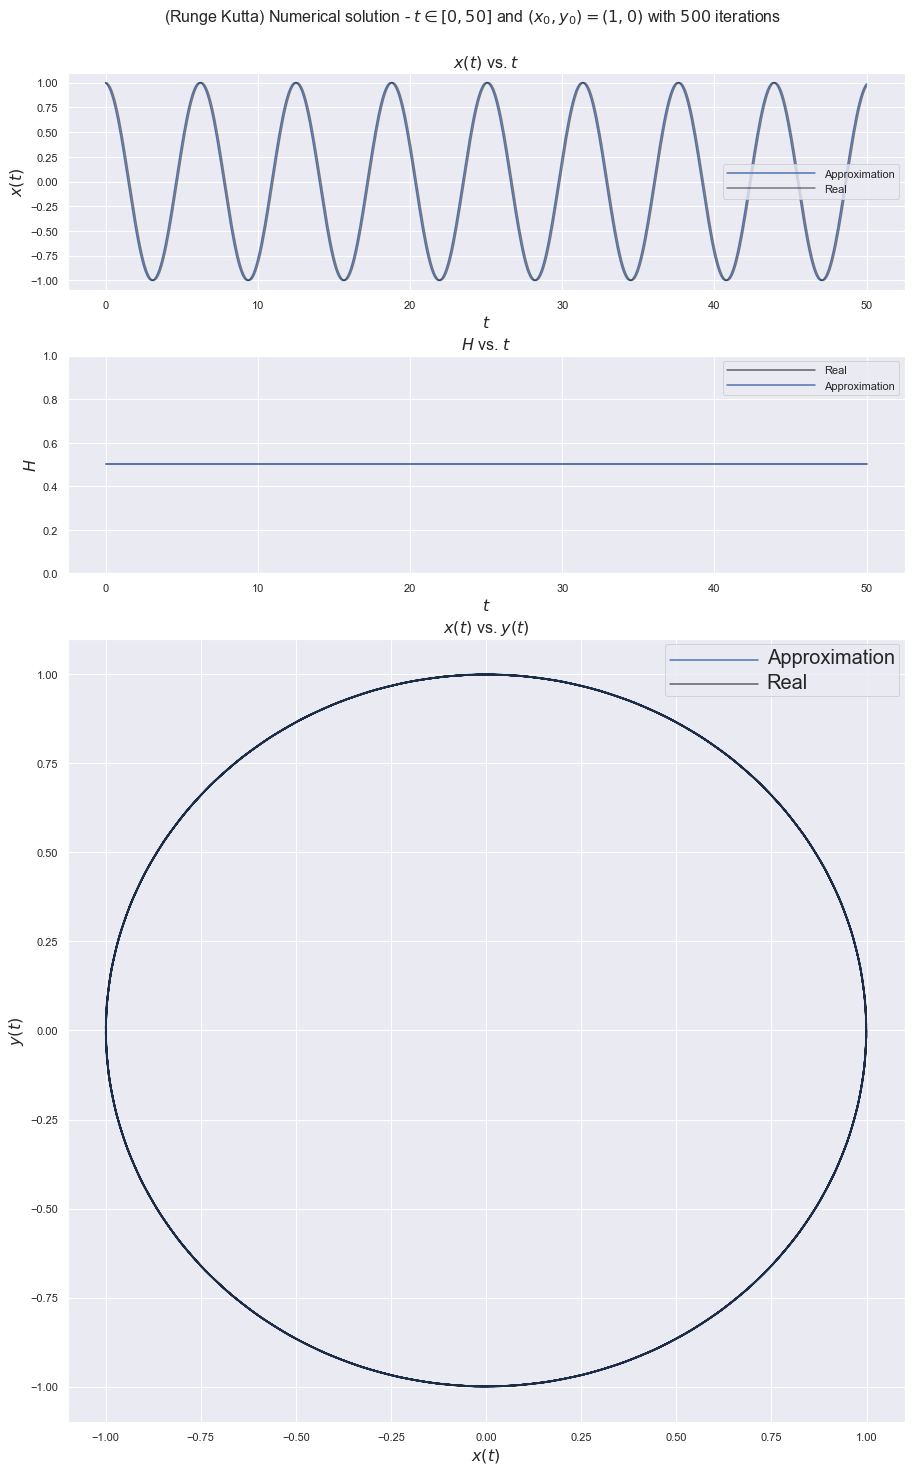

In [25]:
ts = 500
result = rungekutta(f, t=ts)

start = (1, 0)
T = [0, 50]
x_H_list = np.linspace(T[0], T[1], ts + 1)
H_list_real = [Hreal(t, start[0], start[1]) for t in x_H_list]
H_list = [H(t, result[t,0], result[t, 1]) for t in range(len(result))]
# print(H_list_real)

xlist = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]
ylist = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]

plt.rcParams['figure.figsize'] = [15, 23]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot2grid((5,1),(0,0))
ax2.plot(x_H_list, result[:,0], label="Approximation")
ax2.plot(x_H_list, xlist, color="black", alpha=0.5, label="Real")
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)
ax2.legend()

ax3 = plt.subplot2grid((5,1),(1,0))
ax3.plot(x_H_list, H_list_real, color="black", alpha=0.6, label="Real")
ax3.plot(x_H_list, H_list, label="Approximation")
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16)
ax3.legend();
ax3.set_ylim(0, 1)

ax = plt.subplot2grid((5,1),(2,0), rowspan=3)
ax.plot(result[:,0], result[:,1], label="Approximation")
ax.plot(xlist, ylist, color="black", alpha=0.6, label="Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')

plt.suptitle("(Runge Kutta) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $500$ iterations", fontsize=16);

At time step $\Delta t = 0.001$:

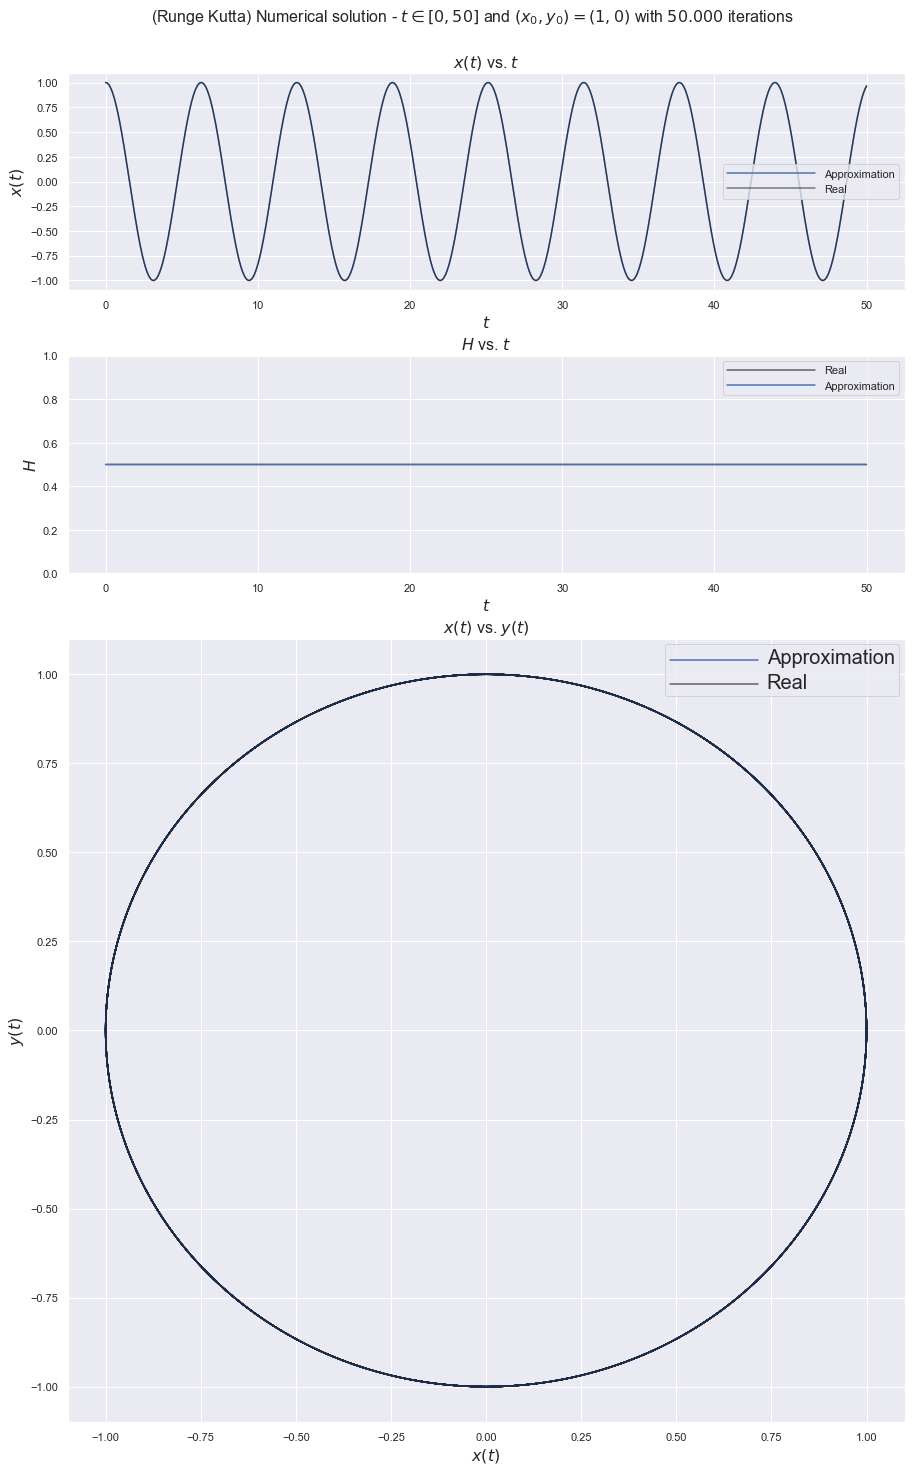

In [26]:
ts = 50000
result = rungekutta(f, t=ts)

start = (1, 0)
T = [0, 50]
x_H_list = np.linspace(T[0], T[1], ts + 1)
H_list_real = [Hreal(t, start[0], start[1]) for t in x_H_list]
H_list = [H(t, result[t,0], result[t, 1]) for t in range(len(result))]
# print(H_list_real)

xlist = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]
ylist = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]

plt.rcParams['figure.figsize'] = [15, 23]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot2grid((5,1),(0,0))
ax2.plot(x_H_list, result[:,0], label="Approximation")
ax2.plot(x_H_list, xlist, color="black", alpha=0.5, label="Real")
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)
ax2.legend()

ax3 = plt.subplot2grid((5,1),(1,0))
ax3.plot(x_H_list, H_list_real, color="black", alpha=0.6, label="Real")
ax3.plot(x_H_list, H_list, label="Approximation")
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16)
ax3.legend();
ax3.set_ylim(0, 1)

ax = plt.subplot2grid((5,1),(2,0), rowspan=3)
ax.plot(result[:,0], result[:,1], label="Approximation")
ax.plot(xlist, ylist, color="black", alpha=0.6, label="Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')

plt.suptitle("(Runge Kutta) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $50.000$ iterations", fontsize=16);

### Order of accuracy

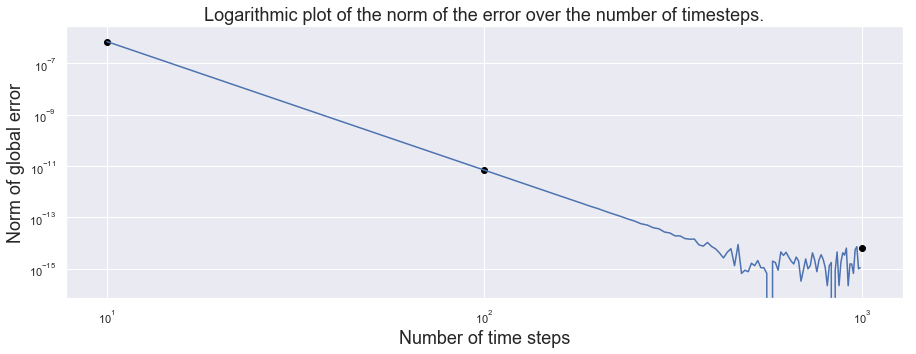

In [27]:
plotNorm(10, rungekutta, steps=10);

In [28]:
maxError(rungekutta, [100, 1000, 10000, 100000]);

Starting at point [1, 0]:
For timestep 0.1 max error is 7.005119130321091e-07
For timestep 0.01 max error is 6.952105557900268e-12
For timestep 0.001 max error is 6.217248937900877e-15
For timestep 0.0001 max error is 1.5543122344752192e-15


----
----
## Exercise 8
It is far from trivial that a time integration method respects conservation properties of the systems of ODEs, such as energy conservation. The topic of *{geometric numerical integration}* deals with integration methods that are structure-preserving; preserving the Hamiltonian structure (and thereby the Hamiltonian itself) is one example.



The Störmer -Verlet (SV) scheme preserves the symplectic structure of Hamiltonian systems. For a general set of ODEs given by $dx/dt = f(y), \,\, dy/dt = g(x)$, the SV scheme with time step $\Delta t$ reads
$$\begin{array}{rcl}
    y^* & = & y_k + \frac{1}{2} \Delta t \cdot g(x_k) \\
    x_{k+1} & = & x_k + \Delta t \cdot f(y^*) \\
    y_{k+1} & = & y^* + \frac{1}{2} \Delta t \cdot g(x_{k+1}).
\end{array}$$

Use this scheme to integrate the ODEs of the harmonic oscillator. Compare with the results from other integration schemes.

What happens with the Hamiltonian when using the SV scheme? What is the order of accuracy of the SV scheme?

----
Function for the Strömer method:

In [29]:

def y_star(t, x0, y0, h, w=1):
    return y(t, x0, y0, w=1) + 0.5 * h * dy(x(t, x0, y0, w=1), t, w=1)

def xk_plus(t, x0, y0, h, w=1):
    xk = x(t, x0, y0, w=1)
    return xk + h * dx(y_star(t, x0, y0, h, w=1), t)

def yk_plus(t, x0, y0, h, w=1):
    ystar = y_star(t, x0, y0, h, w=1)
    xkplus = xk_plus(t, x0, y0, h, w=1)
    return ystar + 0.5 * h * dy(xkplus, t, w=1)

In [30]:
def stromer(f, init=[1, 0], T=[0, 50], t=50, w=1):
    h = (T[1] - T[0]) / t
    z = np.array(init[:])
    result = np.zeros((t+1, 2))
    for i, r in enumerate(np.linspace(T[0],T[1],t+1)):
        x = z[0]
        y = z[1]
        ystar = y + 0.5 * h * dy(x, t, w)
        xnew = x + h * dx(ystar, t)
        ynew = ystar + 0.5 * h * dy(xnew, t, w)
        z = [xnew, ynew]
        result[i][0] = z[0]
        result[i][1] = z[1]
    return result

### Results Strömer method
At time step $\Delta t = 0.1$:

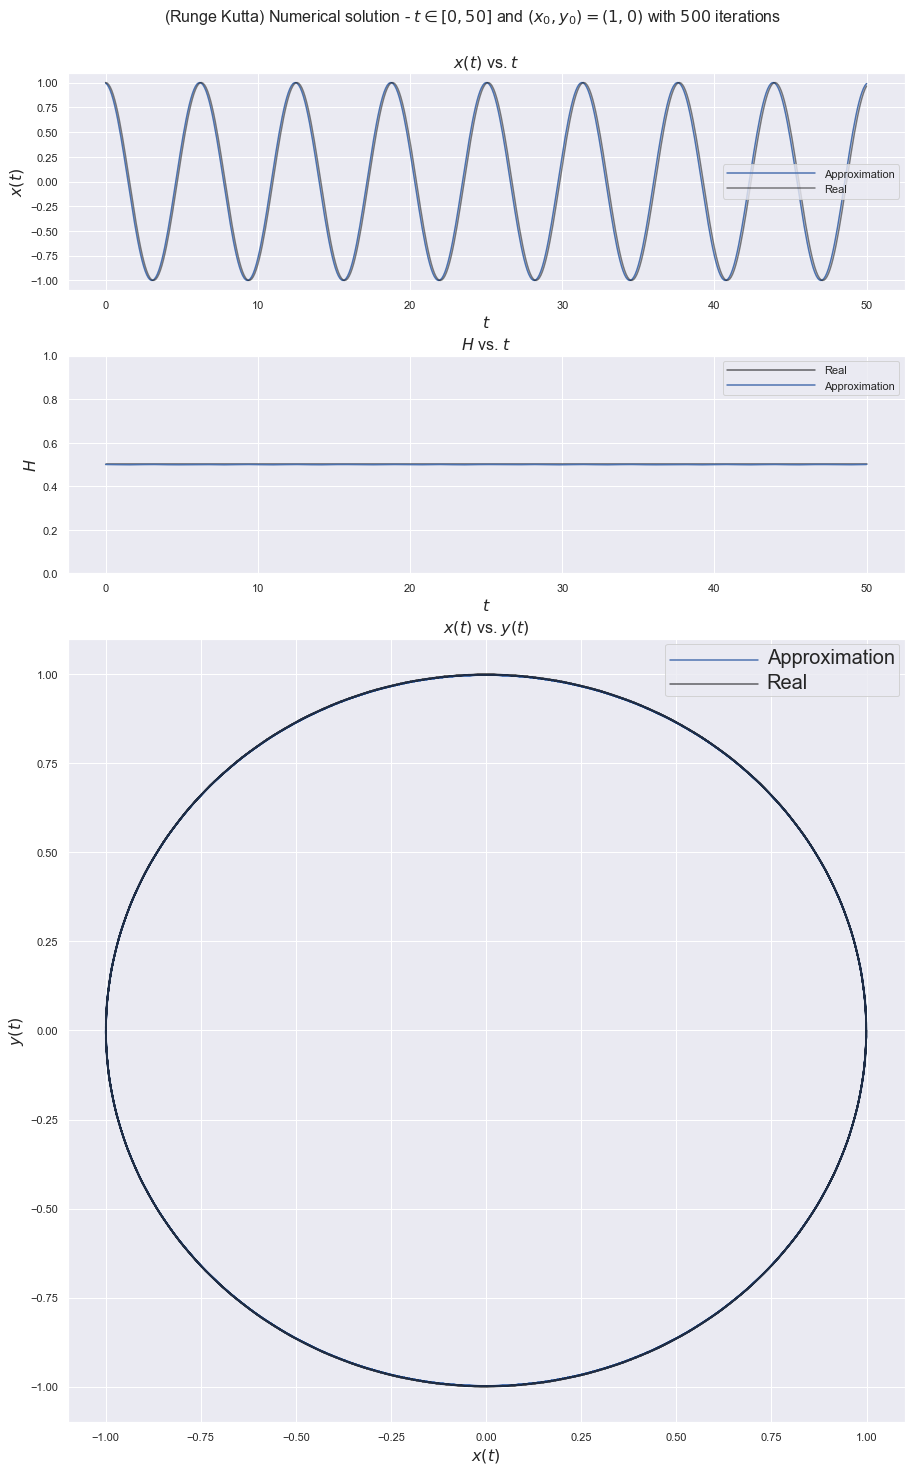

In [31]:
ts = 500
result = stromer(f, t=ts)

start = (1, 0)
T = [0, 50]
x_H_list = np.linspace(T[0], T[1], ts + 1)
H_list_real = [Hreal(t, start[0], start[1]) for t in x_H_list]
H_list = [H(t, result[t,0], result[t, 1]) for t in range(len(result))]
# print(H_list_real)

xlist = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]
ylist = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], ts + 1)]

plt.rcParams['figure.figsize'] = [15, 23]
sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot2grid((5,1),(0,0))
ax2.plot(x_H_list, result[:,0], label="Approximation")
ax2.plot(x_H_list, xlist, color="black", alpha=0.5, label="Real")
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)
ax2.legend()

ax3 = plt.subplot2grid((5,1),(1,0))
ax3.plot(x_H_list, H_list_real, color="black", alpha=0.6, label="Real")
ax3.plot(x_H_list, H_list, label="Approximation")
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16)
ax3.legend();
ax3.set_ylim(0, 1)

ax = plt.subplot2grid((5,1),(2,0), rowspan=3)
ax.plot(result[:,0], result[:,1], label="Approximation")
ax.plot(xlist, ylist, color="black", alpha=0.6, label="Real")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='20')

plt.suptitle("(Runge Kutta) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $500$ iterations", fontsize=16);

### Order of accuracy

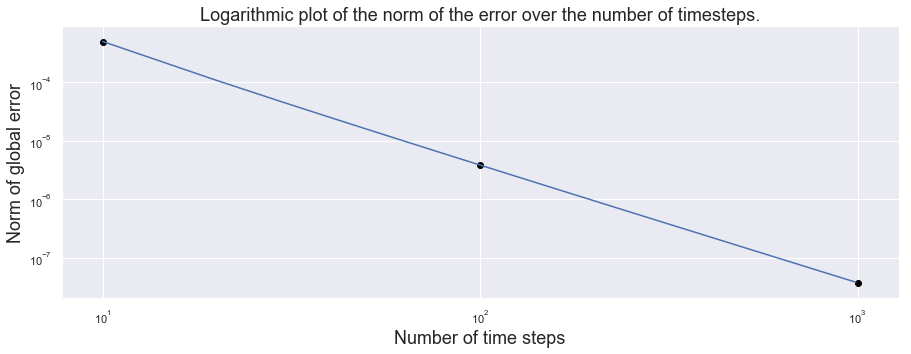

In [32]:
plotNorm(10, stromer, steps=10);

In [33]:
maxError(stromer, [500, 5000, 50000,500000]);

Starting at point [1, 0]:
For timestep 0.02 max error is 1.572668861515858e-05
For timestep 0.002 max error is 1.4889402066842194e-07
For timestep 0.0002 max error is 1.4807219894663604e-09
For timestep 2e-05 max error is 1.482236555716554e-11
